### 监督学习可以解决的问题

监督学习主要用于学习两个数据集之间的关联：观测数据X和外部变量y，我们想要预测y，一般把y叫做target或者label。一般来说，y是一个1D数组，长度为n_samples，也就是跟X的样品数量一致。
### 单词解释：classification分类和regression回归

如果预测任务是在一组有限的label中对观测值分类，或者说对观测到的对象命名，那么这就是一个分类任务。
如果目标是去预测一个连续的目标变量，那么就是一个回归任务。
当scikit-learn处理分类问题时，y是一个整数或者string的向量。


## Nearest neighbor and the curse of dimensionality

### Classifying irises，分类irises：
iris数据集，用于一个分类任务，主要是通过petal和sepal的length和width来识别3种不同的iris。


In [1]:
import numpy as np
from sklearn import datasets
iris=datasets.load_iris()
iris_X=iris.data
iris_y=iris.target
np.unique(iris_y)
#输出的内容只有0，1，2，三个分类。这个数据集在前面也讲过的。

array([0, 1, 2])

### k-Nearest neighbors classifier，K临近分类
最简单的分类器就是NN：给定一个新的观测集X_test，在训练集中找到最近的特征向量。
默认大家理解训练集和测试集的含义。
一个KNN的分类例子：

In [3]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices=np.random.permutation(len(iris_X))
iris_X_train=iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test  = iris_X[indices[-10:]]
iris_y_test  = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(iris_X_train,iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [4]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [5]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

可以看出只有第二个预测错误了~

### The curse of dimensionality，维度的诅咒？

如果预测器想要有效率，我们需要使得临近点之间的距离小于某一个特定值d，取决于问题本身。在一个维度，这需要平均n~1/d个点？？？(this requires on average n~1/d points)。在上面的k-NN例子中，如果数据只用一个特征来描述，并且这个特征取值从0-1变化，有n个训练值。然后新的数据将不会大于1/n？？？no further away than 1/n。因此，NN法则将会生效，只要1/n是小于类间特征变化的规模的？？？
如果feature的数量为p，那么需要n~1/dP个点。假如我们需要在一个维度上有10个点，那么需要10p个点在p个维度上，去铺平[0,1]空间。如果p变得更大，那么需要的训练点数会指数增长。
这是机器学习的核心问题。

## Linear model: from regression to sparsity

### Diabetes Dataset，糖尿病数据集

这个数据集包括10个生理变量（age,sex,weight,blood pressure），在442个病人身上，以及一年后的疾病发展迹象。


In [6]:
diabetes = datasets.load_diabetes()
diabetes_X_train = diabetes.data[:-20]
diabetes_X_test  = diabetes.data[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test  = diabetes.target[-20:]


目前的任务就是通过这些生理变量预测疾病进展。

### Linear regression，线性回归
最简单的形式，就是拟合一个线性模型，通过调整一系列参数，使得平方差的和尽可能小。
y=Χβ+ϵ
X表示data数据，y表示目标变量，β表示系数，ϵ表示噪声。


In [7]:
from sklearn import linear_model
regr=linear_model.LinearRegression()
regr.fit(diabetes_X_train,diabetes_y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
regr.coef_

array([  3.03499549e-01,  -2.37639315e+02,   5.10530605e+02,
         3.27736980e+02,  -8.14131709e+02,   4.92814588e+02,
         1.02848452e+02,   1.84606489e+02,   7.43519617e+02,
         7.60951722e+01])

In [9]:
np.mean((regr.predict(diabetes_X_test)-diabetes_y_test)**2)


2004.5676026898211

In [10]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship
# between X and y.
regr.score(diabetes_X_test,diabetes_y_test)


0.58507530226905735

### Shrinkage，收缩

如果每个维度的点很少，那么噪声会引起较大的变化。


In [11]:
X=np.c_[.5,1].T
y=[.5,1]
test=np.c_[0,2].T
regr=linear_model.LinearRegression()


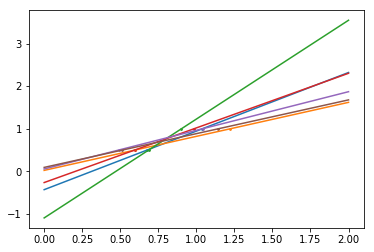

In [13]:
import matplotlib.pyplot as plt
plt.figure()

np.random.seed(0)
for _ in range(6):
    this_X=.1*np.random.normal(size=(2,1))+X
    regr.fit(this_X,y)
    plt.plot(test,regr.predict(test))
    plt.scatter(this_X,y,s=3)
plt.show()

在高维统计学习中，一个解决方案是收缩回归系数到0，任意两个随机选定的观测结果看起来都是不相关的。这叫做Ridge regression。

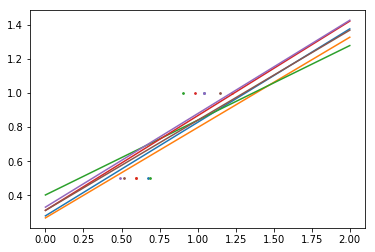

In [14]:
regr = linear_model.Ridge(alpha=.1)

plt.figure() 

np.random.seed(0)
for _ in range(6): 
    this_X = .1*np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test)) 
    plt.scatter(this_X, y, s=3)
plt.show()

这是一个bias/variance调和的例子，ridge alpha系数越大，bias越高，variance越低。
我们可以选择alpha来最小化误差。


In [15]:
alphas = np.logspace(-4, -1, 6)
from __future__ import print_function
print([regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train,).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]) 

[0.58511106838835292, 0.58520730154446743, 0.58546775406984897, 0.58555120365039137, 0.58307170855541601, 0.57058999437280078]


### Sparsity，稀疏性。

仍然是针对糖尿病数据集，因为其具有10个feature，很难直觉上预测一个model，但是我们可以降低维度来考虑。
通过上面的图片，我们可以看出，尽快feature2在全模型上与y的相关系数很强，但当考虑feature1的时候，feature2并没有传递什么信息。
为了改善这个问题，只选择能够传递信息的feature，然后将无关的feature设置为0.Ridge回归将会减弱他们的影响，但是不会设置为0.另一个惩罚方法，成为Lasso，可以实现设置一些系数为0.这样的方法称为稀疏算法。


In [16]:
regr=linear_model.Lasso()
scores=[regr.set_params(alpha=alpha).fit(diabetes_X_train, diabetes_y_train).score(diabetes_X_test, diabetes_y_test) for alpha in alphas]


In [17]:
best_score=alphas[scores.index(max(scores))]
regr.alpha=best_score
regr.fit(diabetes_X_train,diabetes_y_train)


Lasso(alpha=0.025118864315095794, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
regr.coef_

array([   0.        , -212.43764548,  517.19478111,  313.77959962,
       -160.8303982 ,   -0.        , -187.19554705,   69.38229038,
        508.66011217,   71.84239008])

可以看到有些数值为0.

### Classification，分类

对于分类问题，在iris中，线性回归不是正确的方法，因为它会给远离决策边界的数据过于重视。一个线性方法是拟合一个激活函数或者logistic函数，如上面所示。

In [19]:
logistic=linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_X_train,iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


## Support vector machines (SVMs)

### Linear SVMs，线性支持向量机
SVM属于判别模型族：他们试图找到样本的组合来建立一个最大化两个类别之间的差距的平面。正则化由C参数设置，对于C来说，一个小的值意味着利用分离线周围的许多或所有观察值来计算余量（更多的正则化）; C的较大值意味着边界在靠近分离线的观察值上计算（较少正则化）。

SVMs可以用于回归——SVR，或者用于分类——SVC。


In [20]:
from sklearn import svm
svc=svm.SVC(kernel='linear')
svc.fit(iris_X_train,iris_y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Using kernels，使用核
特征空间中的类不总是线性可分的。解决的办法是建立一个不是线性但可能是多项式的决策函数。可以通过设置kernel参数来决定。
